# Simplest use case

## Running a model from the config file

Setting up the `dolphin` ecosystem:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yml' files for each lens system,
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_error_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Config file format

The 'config_{lens_name}.yml' file provides you options to set up the lens model. Here is the content of the config file that is used in the example model below.

### create a `Processor` instance and point to the IO directory

In [1]:
from dolphin.processor import Processor

processor = Processor("../io_directory_example/")

### Run a model by calling the  `swim()` method

In [2]:
processor.swim(lens_name="lens_system2", model_id="example", log=False)

Computing the PSO ...
10
20
30
40
50
Max iteration reached! Stopping.
-1.8320788486836512 reduced X^2 of best position
-13162.570488367692 logL
14369 effective number of data points
[{'theta_E': 1.0943819714900778, 'gamma': 2.0, 'e1': 0.05118040811094967, 'e2': -0.04015493887208093, 'center_x': -0.06030374393732835, 'center_y': -0.04848472803571372}, {'gamma_ext': 0.002399416443330552, 'psi_ext': -0.02949260144448913, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'n_max': 4, 'beta': 0.1506416387402177, 'center_x': 0.08208867212160686, 'center_y': -0.28050863449300834}] source result
[{'amp': 1, 'R_sersic': 1.092587531693988, 'n_sersic': 4.0, 'e1': -0.06871484531064473, 'e2': 0.0656724846761498, 'center_x': 0.046367870553344875, 'center_y': -0.053361926871298475}] lens light result
[] point source result
{} special param result
79.11956787109375 time used for  PSO
Computing the PSO ...
10
20
30
40
50
Max iteration reached! Stopping.
-1.5843653770748596 reduced X^2 of best position
-11

  0%|          | 0/100 [00:00<?, ?it/s]/Users/ajshajib/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 100/100 [05:06<00:00,  3.07s/it]

Computing the MCMC...
Number of walkers =  32
Burn-in iterations:  0
Sampling iterations (in current run): 100
309.38478803634644 time taken for MCMC sampling


## Let's check the output

In [3]:
from dolphin.analysis.output import Output

output = Output("../io_directory_example/")

-1.1909290145416986 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  1.190929014541698


/Users/ajshajib/Dropbox/PyCharm Projects/lenstronomy/lenstronomy/Plots/model_band_plot.py:57: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("cubehelix"))
  cmap.set_bad(color='k', alpha=1.)
/Users/ajshajib/Dropbox/PyCharm Projects/lenstronomy/lenstronomy/Plots/model_band_plot.py:58: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("cubehelix"))
  cmap.set_under('k')
/Users/ajshajib/Dropbox/PyCharm Projects/lenstronomy/lenstronomy/Plots/model_band_plot.py:88: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(se

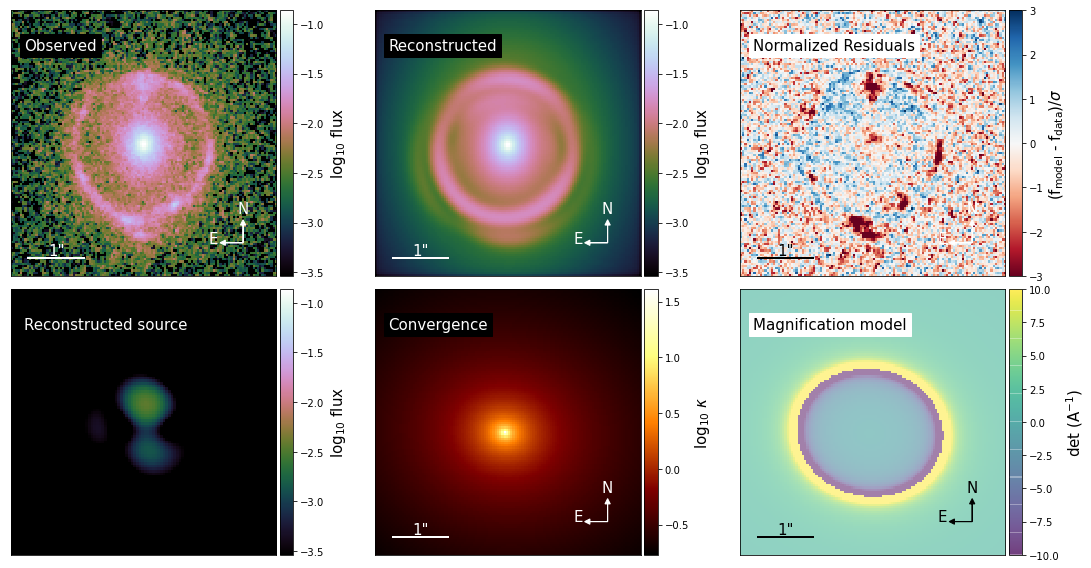

In [4]:
fig = output.plot_model_overview(lens_name="lens_system2", model_id="example")

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

In [5]:
output.load_output(lens_name="lens_system2", model_id="example")

output.kwargs_result

{'kwargs_lens': [{'theta_E': 1.2326899640213018,
   'gamma': 1.998918057975498,
   'e1': 0.023771532230263397,
   'e2': 0.007322808057297473,
   'center_x': 0.07425521322394245,
   'center_y': -0.21335353495417878},
  {'gamma_ext': 0.004831374500885104,
   'psi_ext': -0.07328085140675819,
   'ra_0': 0,
   'dec_0': 0}],
 'kwargs_source': [{'amp': 1,
   'n_max': 4,
   'beta': 0.1472201512075073,
   'center_x': 0.07919321428442905,
   'center_y': -0.2524963794337973}],
 'kwargs_lens_light': [{'amp': 1,
   'R_sersic': 2.703115633851944,
   'n_sersic': 4.0,
   'e1': -0.11964362032082303,
   'e2': 0.000947148809756073,
   'center_x': 0.024595750787618078,
   'center_y': -0.053359526560273124}],
 'kwargs_ps': [],
 'kwargs_special': {},
 'kwargs_extinction': []}

When necessary, the settings of the model run---that was read out of the 'config_{lens_name}.yml' file---can be accessed through the `output.model_settings` variable.

In [6]:
output.model_settings

{'system_name': 'lens_system2',
 'band': ['F390W'],
 'pixel_size': 0.04,
 'model': {'lens': ['SPEP', 'SHEAR_GAMMA_PSI'],
  'lens_light': ['SERSIC_ELLIPSE'],
  'source_light': ['SHAPELETS']},
 'lens_option': {'centroid_init': [0.04, -0.04]},
 'lens_light_option': {'fix': {'0': {'n_sersic': 4.0}}},
 'source_light_option': {'n_max': [4]},
 'fitting': {'pso': True,
  'pso_settings': {'num_particle': 20, 'num_iteration': 50},
  'sampling': True,
  'sampler': 'MCMC',
  'mcmc_settings': {'burnin_step': 0,
   'iteration_step': 100,
   'walker_ratio': 2}},
 'numeric_option': {'supersampling_factor': [2]}}